---
# **Group 15**
## - **Bishal Ghosh - (23200342)** (Primary contributor to this code)
## - **Stebin Sebastian - (23200018)** (Secondary contributor to this code) 
## - **Thapanee Sasuwan - (23201498)** (Looked after the QA of the code)
## - **Ambarish Tirumalai - (23201747)** (Looked after the code comments and Markdown)
---

# Prostate Cancer Data Analysis and Predictions

---
## Exploratory Data Analysis
---

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix 
import os

In [2]:
current_directory = os.getcwd()
file_name = "/Diseases Data/Prostate_Cancer.csv"
csv_path = current_directory+file_name
Cancer = pd.read_csv(csv_path)
Cancer.head(20)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [3]:
Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
Cancer.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [5]:
Cancer.tail()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066
99,100,M,16,27,94,643,0.098,0.114,0.188,0.064


In [6]:
Cancer.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [7]:
Cancer.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [8]:
#  drop columns
Cancer.drop(['id'],axis=1,inplace=True)

In [9]:
Cancer.head()

,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [10]:

# We have to convert them from object to integer.
Cancer.diagnosis_result = [1 if each == 'M' else 0 for each in Cancer.diagnosis_result]

In [11]:

Cancer.diagnosis_result.value_counts()
# we assigned 1 and 0 to M and B. 

diagnosis_result
1    62
0    38
Name: count, dtype: int64

In [12]:
# x and y values for test-train datas split.
y = Cancer.diagnosis_result.values
x_data = Cancer.drop(['diagnosis_result'],axis=1)

In [15]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

In [17]:
# split datas as train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
method_names=[] 
method_scores=[]

---
### Using ANN (Aritifical Neural Network) to get the Machine Learning prediction model
---


In [44]:
# ANN!
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 50, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5774 - loss: 0.6931  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5670 - loss: 0.6928 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.6925 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 0.6923 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5774 - loss: 0.6920 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 0.6915 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5879 - loss: 0.6912 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.6907 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6191 - loss: 0.6895 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.6896 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5879 - loss: 0.6890 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5774 - loss: 0.6888 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4729 - loss: 0.6932
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5753 - loss: 0.6929 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5544 - loss: 0.6928 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5440 - loss: 0.6927 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5544 - loss: 0.6925 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5544 - loss: 0.6924 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6918 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.6919 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6914 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5857 - loss: 0.6911 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5649 - loss: 0.6913 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.6903 
Ep

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4090 - loss: 0.6932  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6015 - loss: 0.6929 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6327 - loss: 0.6926 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 0.6927 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.6924 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5910 - loss: 0.6922 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 0.6922 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5702 - loss: 0.6920 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6015 - loss: 0.6915 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5910 - loss: 0.6913 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.6911 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5806 - loss: 0.6907 


Epoch 1/200


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4547 - loss: 0.6931  
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5688 - loss: 0.6928 
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5883 - loss: 0.6924 
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5453 - loss: 0.6924 
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5414 - loss: 0.6923 
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5805 - loss: 0.6914 
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5492 - loss: 0.6917 
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5609 - loss: 0.6910 
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5648 - loss: 0.6904 
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.6903 
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6117 - loss: 0.6874 
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5727 - loss: 0.6880 


Text(95.72222222222221, 0.5, 'True')

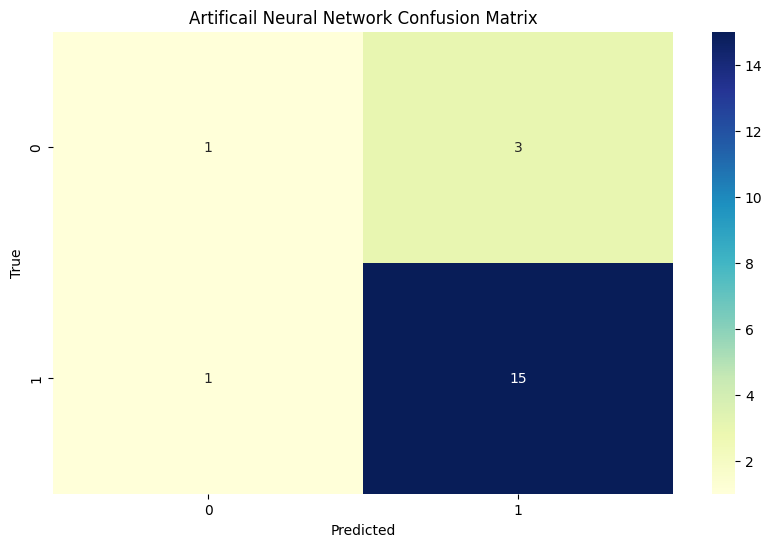

In [45]:
# Train the ANN model on the entire training dataset
classifier.fit(x_train, y_train)

# Use the trained model to make predictions on the test dataset
y_pred = classifier.predict(x_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5)

# Compute the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Extract values from confusion matrix
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

# Calculate metrics
accuracy = (true_positives + true_negatives) / np.sum(conf_matrix)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = true_negatives / (true_negatives + false_positives)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Specificity:", specificity)


# Plotting confusion matrices
plt.figure(figsize=(10, 6))

# Confusion Matrix 1 (Logistic Regression)
plt.subplot(1, 1, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Artificail Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

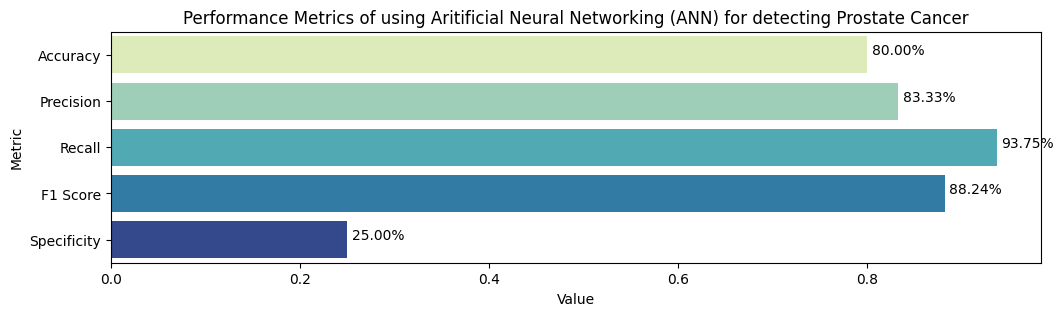

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']
values = [accuracy, precision, recall, f1_score, specificity]

# Create a bar plot
plt.figure(figsize=(12, 3))
ax = sns.barplot(x=values, y=metrics, palette='YlGnBu')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Metric')
plt.title('Performance Metrics of using Aritificial Neural Networking (ANN) for detecting Prostate Cancer')

# Add percentage values at the end of each bar
for i, v in enumerate(values):
    ax.text(v + 0.005, i, f'{v*100:.2f}%', color='black', ha='left')

# Show plot
plt.show()


---
## ASKING THE ANN MODEL TO DO PREDICTION ON RANDOMLY SELECTED RECORD FROM THE DATA FRAME
---

In [60]:
import random

# Select a random row index
random_index = random.randint(0, len(Cancer) - 1)

# Select the random row
random_row = Cancer.iloc[random_index]

# Display the random row
print("Randomly Selected Row:")
print(random_row)

Randomly Selected Row:
diagnosis_result       1.000
radius                21.000
texture               18.000
perimeter            104.000
area                 818.000
smoothness             0.092
compactness            0.084
symmetry               0.180
fractal_dimension      0.054
Name: 75, dtype: float64


In [61]:

# Extract features from the random row
random_row_features = random_row.drop('diagnosis_result')

# Reshape the features for prediction
random_row_features_reshaped = random_row_features.values.reshape(1, -1)

# Normalize the features using the scaler
random_row_features_normalized = scaler.transform(random_row_features_reshaped)

# Predict the diagnosis result using the trained ANN model
prediction = classifier.predict(random_row_features_normalized)

# Convert prediction to human-readable format (Malignant or Benign)
predicted_diagnosis = 'Malignant' if prediction > 0.5 else 'Benign'

# Get the original diagnosis result from the record
original_diagnosis = 'Malignant' if random_row['diagnosis_result'] == 1 else 'Benign'



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [62]:
# Print the predicted and original diagnosis result
print("\nPredicted Diagnosis Result:", predicted_diagnosis)
print("Original Diagnosis Result:", original_diagnosis)


Predicted Diagnosis Result: Malignant
Original Diagnosis Result: Malignant
